In [2]:
library(dplyr)
library(tidyr)
library(tidyverse)
library(lubridate)
library(tibble)
library(data.table)
library(MASS)
library(pscl)
library(caret)
library(readr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, fi

In [3]:
#carta = read_csv('carta.csv')[ , -c(1)]
carta = read_csv('carta4.csv')[ , -c(1)]

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  scheduled_arrival_time = col_time(format = ""),
  actual_arrival_time = col_time(format = ""),
  direction_desc = col_character(),
  service_period = col_character(),
  date = col_date(format = ""),
  scheduled_datetime = col_datetime(format = ""),
  actual_arrival_datetime = col_datetime(format = ""),
  trip_start_time = col_time(format = ""),
  trip_date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [4]:
carta$trip_id = as.character(carta$trip_id)
carta$stop_id = as.character(carta$stop_id)
carta$route_id = as.character(carta$route_id)
carta$direction_id = as.character(carta$direction_id)

In [5]:
head(carta)

trip_id,scheduled_arrival_time,actual_arrival_time,stop_id,stop_sequence,stop_lat,stop_lon,route_id,direction_id,board_count,⋯,occupancy,direction_desc,service_period,date,scheduled_datetime,actual_arrival_datetime,trip_start_time,day_of_week,trip_date,hour
<chr>,<time>,<time>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<chr>,<chr>,<date>,<dttm>,<dttm>,<time>,<dbl>,<date>,<dbl>
139669,14:00:47,14:05:00,12,2,35.0507,-85.30953,4,0,2,⋯,8,OUTBOUND,Weekday,2019-11-01,2019-11-01 14:00:47,2019-11-01 14:05:00,14:00:00,4,2019-11-01,14
139670,16:15:47,16:36:00,12,2,35.0507,-85.30953,4,0,0,⋯,5,OUTBOUND,Weekday,2019-11-01,2019-11-01 16:15:47,2019-11-01 16:36:00,16:15:00,4,2019-11-01,16
139671,18:30:52,18:41:00,12,2,35.0507,-85.30953,4,0,0,⋯,5,OUTBOUND,Weekday,2019-11-01,2019-11-01 18:30:52,2019-11-01 18:41:00,18:30:00,4,2019-11-01,18
139737,20:35:24,20:43:00,12,87,35.0507,-85.30953,4,1,0,⋯,3,INBOUND,Weekday,2019-11-01,2019-11-01 20:35:24,2019-11-01 20:43:00,19:40:00,4,2019-11-01,20
139675,17:45:27,17:45:00,12,2,35.0507,-85.30953,4,0,0,⋯,1,OUTBOUND,Weekday,2019-11-01,2019-11-01 17:45:27,2019-11-01 17:45:00,17:45:00,4,2019-11-01,17
139688,13:40:47,13:42:00,12,2,35.0507,-85.30953,4,0,3,⋯,7,OUTBOUND,Weekday,2019-11-01,2019-11-01 13:40:47,2019-11-01 13:42:00,13:40:00,4,2019-11-01,13


In [6]:
unique(carta$day_of_week)

[1] 4 5 6 0 1 2 3

In [7]:
max(sort(carta$date))

[1] "2020-05-31"

In [9]:
min(sort(carta$date))

[1] "2019-01-02"

# Weather Data

## Part A

In [10]:
carta_weather_A = read_csv(unzip('Pre_lock_datetimes_weather.zip', 'Pre_lock_datetimes_weather.csv'))
head(carta_weather_A)


── Column specification ────────────────────────────────────────────────────────
cols(
  date_time = col_datetime(format = ""),
  Estimated_Temp = col_double(),
  Estimated_Precip = col_double()
)




date_time,Estimated_Temp,Estimated_Precip
<dttm>,<dbl>,<dbl>
2019-01-02 08:41:00,8.141667,0
2019-01-02 08:41:06,8.142500,0
2019-01-02 08:41:12,8.143333,0
2019-01-02 08:42:03,8.150417,0
2019-01-02 08:43:10,8.159722,0
2019-01-02 08:44:09,8.167917,0


In [11]:
max(date(carta_weather_A$date_time))

[1] "2019-03-05"

In [12]:
Carta_weather_A = carta_weather_A %>%
    mutate(month = month(date_time),
           date = date(date_time),
           hour = hour(date_time)) %>%
    group_by(date, hour) %>%
    summarise(month, temp = mean(Estimated_Temp), precip = mean(Estimated_Precip))

head(Carta_weather_A)

`summarise()` has grouped output by 'date', 'hour'. You can override using the `.groups` argument.



date,hour,month,temp,precip
<date>,<int>,<int>,<dbl>,<dbl>
2019-01-02,4,1,8.417796,0
2019-01-02,4,1,8.417796,0
2019-01-02,4,1,8.417796,0
2019-01-02,4,1,8.417796,0
2019-01-02,4,1,8.417796,0
2019-01-02,4,1,8.417796,0


## Part B

In [13]:
carta_weather_B = read_csv(unzip('Post_lock_datetimes_weather.zip', 'Post_lock_datetimes_weather.csv'))
head(carta_weather_B)


── Column specification ────────────────────────────────────────────────────────
cols(
  date_time = col_datetime(format = ""),
  Estimated_Temp = col_double(),
  Estimated_Precip = col_double()
)




date_time,Estimated_Temp,Estimated_Precip
<dttm>,<dbl>,<dbl>
2019-11-01 08:51:00,2.800000,0
2019-11-01 08:54:59,2.800000,0
2019-11-01 09:05:00,2.891667,0
2019-11-01 09:05:21,2.898083,0
2019-11-01 09:05:39,2.903583,0
2019-11-01 09:06:14,2.914278,0


In [14]:
min(sort(carta_weather_B$date_time))

[1] "2019-03-06 UTC"

In [15]:
Carta_weather_B = carta_weather_B %>%
    mutate(month = month(date_time),
           date = date(date_time),
           hour = hour(date_time)) %>%
    group_by(date, hour) %>%
    summarise(month, temp = mean(Estimated_Temp), precip = mean(Estimated_Precip))

head(Carta_weather_B)

`summarise()` has grouped output by 'date', 'hour'. You can override using the `.groups` argument.



date,hour,month,temp,precip
<date>,<int>,<int>,<dbl>,<dbl>
2019-03-06,0,3,-1.1,0
2019-03-06,0,3,-1.1,0
2019-03-06,0,3,-1.1,0
2019-03-06,0,3,-1.1,0
2019-03-06,0,3,-1.1,0
2019-03-06,0,3,-1.1,0


## Combination of these two dataframes into one:

In [16]:
Carta_weather = rbind(Carta_weather_A, Carta_weather_B)
head(Carta_weather)

date,hour,month,temp,precip
<date>,<int>,<int>,<dbl>,<dbl>
2019-01-02,4,1,8.417796,0
2019-01-02,4,1,8.417796,0
2019-01-02,4,1,8.417796,0
2019-01-02,4,1,8.417796,0
2019-01-02,4,1,8.417796,0
2019-01-02,4,1,8.417796,0


In [17]:
dim(Carta_weather)

[1] 10140444        5

### Dates:

In [18]:
min(Carta_weather$date)

[1] "2019-01-02"

In [19]:
max(Carta_weather$date)

[1] "2020-06-05"

## Left join on the Carta data:

In [20]:
carta = left_join(carta, Carta_weather, on = c('date', 'hour'))

Joining, by = c("date", "hour")



In [21]:
service_kind = if_else((carta$day_of_week == 5) | (carta$day_of_week == 6), "weekend", "weekday")

In [22]:
carta$service_kind = service_kind

In [23]:
carta$month = factor(carta$month)
carta$hour = factor(carta$hour)
carta$service_kind = factor(carta$service_kind)

In [24]:
head(carta)

trip_id,scheduled_arrival_time,actual_arrival_time,stop_id,stop_sequence,stop_lat,stop_lon,route_id,direction_id,board_count,⋯,scheduled_datetime,actual_arrival_datetime,trip_start_time,day_of_week,trip_date,hour,month,temp,precip,service_kind
<chr>,<time>,<time>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dttm>,<dttm>,<time>,<dbl>,<date>,<fct>,<fct>,<dbl>,<dbl>,<fct>
139669,14:00:47,14:05:00,12,2,35.0507,-85.30953,4,0,2,⋯,2019-11-01 14:00:47,2019-11-01 14:05:00,14:00:00,4,2019-11-01,14,11,9.454317,0,weekday
139669,14:00:47,14:05:00,12,2,35.0507,-85.30953,4,0,2,⋯,2019-11-01 14:00:47,2019-11-01 14:05:00,14:00:00,4,2019-11-01,14,11,9.454317,0,weekday
139669,14:00:47,14:05:00,12,2,35.0507,-85.30953,4,0,2,⋯,2019-11-01 14:00:47,2019-11-01 14:05:00,14:00:00,4,2019-11-01,14,11,9.454317,0,weekday
139669,14:00:47,14:05:00,12,2,35.0507,-85.30953,4,0,2,⋯,2019-11-01 14:00:47,2019-11-01 14:05:00,14:00:00,4,2019-11-01,14,11,9.454317,0,weekday
139669,14:00:47,14:05:00,12,2,35.0507,-85.30953,4,0,2,⋯,2019-11-01 14:00:47,2019-11-01 14:05:00,14:00:00,4,2019-11-01,14,11,9.454317,0,weekday
139669,14:00:47,14:05:00,12,2,35.0507,-85.30953,4,0,2,⋯,2019-11-01 14:00:47,2019-11-01 14:05:00,14:00:00,4,2019-11-01,14,11,9.454317,0,weekday


# Bus Stops

In [25]:
Bus_stops = read_csv(unzip('Bus_Stops.zip', 'Bus_Stops.csv'))
Bus_stops$stop_id <- as.character(Bus_stops$stop_id)

head(Bus_stops)


── Column specification ────────────────────────────────────────────────────────
cols(
  stop_id = col_double(),
  stop_lon = col_double(),
  stop_lat = col_double()
)




stop_id,stop_lon,stop_lat
<chr>,<dbl>,<dbl>
971,-85.24681,35.02435
146,-85.30462,34.98958
1545,-85.25086,35.02603
972,-85.24853,35.02572
81,-85.30489,34.99030
90,-85.30497,34.99125


## Subordinate or Auxiliary Functions

### Data Normalization

In [26]:
normalizer <- function(x){
    
    x_min = min(x)
    x_max = max(x)
    x_norm = (x - x_min)/(x_max - x_min)
    
    return(x_norm)
} 

### Data Standardization

In [27]:
standardizer <- function(x){
    x_std = x.std()
    x_mean = x.mean()
    x_standard = (x - x_mean)/x_std
    
    return(x_standard)
}

## Extract Model Coefficients

In [28]:
get_Model_Coeff <- function(dtfrm){
    Best_Model = dtfrm[['Selected_Model']]
    
    if(Best_Model == 'Poisson'){
        Model_Coeff = data.frame(dtfrm[['Trained_Models']][['Poiss']][['coefficients']])
        colnames(Model_Coeff) = c('Coefficient_Value')
        Model_Coeff$Variable = rownames(Model_Coeff)
        
        return(Model_Coeff)
    }
    else if(Best_Model == 'Negative_Binomial'){
        Model_Coeff = data.frame(dtfrm[['Trained_Models']][['NB']][['coefficients']])
        colnames(Model_Coeff) = c('Coefficient_Values')
        Model_Coeff$Variable = rownames(Model_Coeff)
        
        return(Model_Coeff)
    }
    else if(Best_Model == 'ZI_Poisson'){
        Model_Coeff_Count = data.frame(dtfrm[['Trained_Models']][['ZI_Poiss']][['coefficients']][['count']])
        colnames(Model_Coeff_Count) = c('Coefficient_Values')
        Model_Coeff_Count$Variable = rownames(Model_Coeff_Count)
        
        Model_Coeff_Zero = data.frame(dtfrm[['Trained_Models']][['ZI_Poiss']][['coefficients']][['zero']])
        colnames(Model_Coeff_Zero) = c('Coefficient_Values')
        Model_Coeff_Zero$Variable = rownames(Model_Coeff_Zero)
        
        Model_Coeff = merge(Model_Coeff_Count, Model_Coeff_Zero, by = 'Variable', all.x = T)
        colnames(Model_Coeff) = c('Variable', 'Coefficient_Value_Count', 'Coefficient_Value_Zero')
        
        return(Model_Coeff)
    }
    else if(Best_Model == 'ZI_Negative_Binomial'){
        Model_Coeff_Count = data.frame(dtfrm[['Trained_Models']][['ZI_NB']][['coefficients']][['count']])
        colnames(Model_Coeff_Count) = c('Coefficient_Values')
        Model_Coeff_Count$Variable = rownames(Model_Coeff_Count)
        
        Model_Coeff_Zero = data.frame(dtfrm[['Trained_Models']][['ZI_NB']][['coefficients']][['zero']])
        colnames(Model_Coeff_Zero) = c('Coefficient_Values')
        Model_Coeff_Zero$Variable = rownames(Model_Coeff_Zero)
        
        Model_Coeff = merge(Model_Coeff_Count, Model_Coeff_Zero, by = 'Variable', all.x = T)
        colnames(Model_Coeff) = c('Variable', 'Coefficient_Value_Count', 'Coefficient_Value_Zero')
        
        return(Model_Coeff)
    }
    else if(Best_Model == 'Hurdle_Poisson_and_Binomial'){
        Model_Coeff_Count = data.frame(dtfrm[['Trained_Models']][['hurdle']][['coefficients']][['count']])
        colnames(Model_Coeff_Count) = c('Coefficient_Values')
        Model_Coeff_Count$Variable = rownames(Model_Coeff_Count)
        
        Model_Coeff_Zero = data.frame(dtfrm[['Trained_Models']][['hurdle']][['coefficients']][['zero']])
        colnames(Model_Coeff_Zero) = c('Coefficient_Values')
        Model_Coeff_Zero$Variable = rownames(Model_Coeff_Zero)
        
        Model_Coeff = merge(Model_Coeff_Count, Model_Coeff_Zero, by = 'Variable', all.x = T)
        colnames(Model_Coeff) = c('Variable', 'Coefficient_Value_Count', 'Coefficient_Value_Zero')
        
        return(Model_Coeff)
    }
}

## Extract Chart

In [29]:
get_Chart = function(dtfrm, dtfrm_test){
    Best_Model = dtfrm[['Selected_Model']]
    Chart = dtfrm_test[ , c(1, 2, 3, 4)]
    if(Best_Model == 'Poisson'){
        Chart$Predicted = dtfrm[['Predicted']][ , c(1)]
        return(Chart)
    }
    else if(Best_Model == 'Negative_Binomial'){
        Chart$Predicted = dtfrm[['Predicted']][ , c(2)]
        return(Chart)
    }
    else if(Best_Model == 'ZI_Poisson'){
        Chart$Predicted = dtfrm[['Predicted']][ , c(3)]
        return(Chart)
    }
    else if(Best_Model == 'ZI_Negative_Binomial'){
        Chart$Predicted = dtfrm[['Predicted']][ , c(4)]
        return(Chart)
    }
    else if(Best_Model == 'Hurdle_Poisson_and_Binomial'){
        Chart$Predicted = dtfrm[['Predicted']][ , c(5)]
        return(Chart)
    }
}


## Extract Performance

In [30]:
get_Performance = function(dtfrm){
    Best_Model = dtfrm[['Selected_Model']]
    
    if(Best_Model == 'Poisson'){
        train_rmse = dtfrm[['train_RMSEs']][ , c(1)]
        test_rmse = dtfrm[['test_RMSEs']][ , c(1)]
        Performance = data.frame(cbind('Train_RMSE' = train_rmse, 'Test_RMSE' = test_rmse))
        rownames(Performance) = c('Poisson')
        return(Performance)
    }
    else if(Best_Model == 'Negative_Binomial'){
        train_rmse = dtfrm[['train_RMSEs']][ , c(2)]
        test_rmse = dtfrm[['test_RMSEs']][ , c(2)]
        Performance = data.frame(cbind('Train_RMSE' = train_rmse, 'Test_RMSE' = test_rmse))
        rownames(Performance) = c('Negative_Binomial')
        return(Performance)
    }
    else if(Best_Model == 'ZI_Poisson'){
        train_rmse = dtfrm[['train_RMSEs']][ , c(3)]
        test_rmse = dtfrm[['test_RMSEs']][ , c(3)]
        Performance = data.frame(cbind('Train_RMSE' = train_rmse, 'Test_RMSE' = test_rmse))
        rownames(Performance) = c('ZIP_Poisson')
        return(Performance)
    }
    else if(Best_Model == 'ZI_Negative_Binomial'){
        train_rmse = dtfrm[['train_RMSEs']][ , c(4)]
        test_rmse = dtfrm[['test_RMSEs']][ , c(4)]
        Performance = data.frame(cbind('Train_RMSE' = train_rmse, 'Test_RMSE' = test_rmse))
        rownames(Performance) = c('ZIP_Negative_Binomial')
        return(Performance)
    }
    else if(Best_Model == 'Hurdle_Poisson_and_Binomial'){
        train_rmse = dtfrm[['train_RMSEs']][ , c(5)]
        test_rmse = dtfrm[['test_RMSEs']][ , c(5)]
        Performance = data.frame(cbind('Train_RMSE' = train_rmse, 'Test_RMSE' = test_rmse))
        rownames(Performance) = c('Hurdle_Poisson_and_Binomial')
        return(Performance)
    }    
}

## Extract Selected Model AIC values

In [31]:
get_Model_Selection = function(dtfrm){
    AIC_scores = dtfrm[['Models_AIC']]
    colnames(AIC_scores) = c('Model_Name', 'AIC')
    AIC_scores$Model_Name = as.character(AIC_scores$Model_Name)
    AIC_scores$AIC = round(as.numeric(as.character(AIC_scores$AIC)),3)
    return(AIC_scores)
}

# Radial Influence

In [32]:
radial_influence <- function(st, DT){
  
    n_row = dim(DT)[1]
    
    x0 = DT[DT['stop_id'] == st, ]$stop_lon
    y0 = DT[DT['stop_id'] == st, ]$stop_lat
    
    radial_dist = 0
    condition = 0
    
    for(i in c(1:n_row)){
        radial_dist[i] = sqrt((x0 - DT$stop_lon[i])^{2} + (y0 - DT$stop_lat[i])^{2})
    }
    radial_dist = radial_dist
    influence = data.frame(cbind('stop_id' = DT$stop_id, 'Radial_Distance' = radial_dist))
    influence$Radial_Distance = as.numeric(as.character(influence$Radial_Distance))
        
    Influence = influence %>%
      mutate(Condition = if_else((Radial_Distance <= 0.007246377) == T, 'Inside', 'Outside'))
   
    return(Influence)
    
}


## Example

In [33]:
XdistX = radial_influence('12', Bus_stops)
head(XdistX)

,stop_id,Radial_Distance,Condition
,<fct>,<dbl>,<chr>
1,971,0.06803262,Outside
2,146,0.06131507,Outside
3,1545,0.06364519,Outside
4,972,0.06592259,Outside
5,81,0.06057911,Outside
6,90,0.05963092,Outside


In [34]:
XdistX = left_join(XdistX, Bus_stops, by = c('stop_id'))
head(XdistX)

,stop_id,Radial_Distance,Condition,stop_lon,stop_lat
,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,971,0.06803262,Outside,-85.24681,35.02435
2,146,0.06131507,Outside,-85.30462,34.98958
3,1545,0.06364519,Outside,-85.25086,35.02603
4,972,0.06592259,Outside,-85.24853,35.02572
5,81,0.06057911,Outside,-85.30489,34.99030
6,90,0.05963092,Outside,-85.30497,34.99125


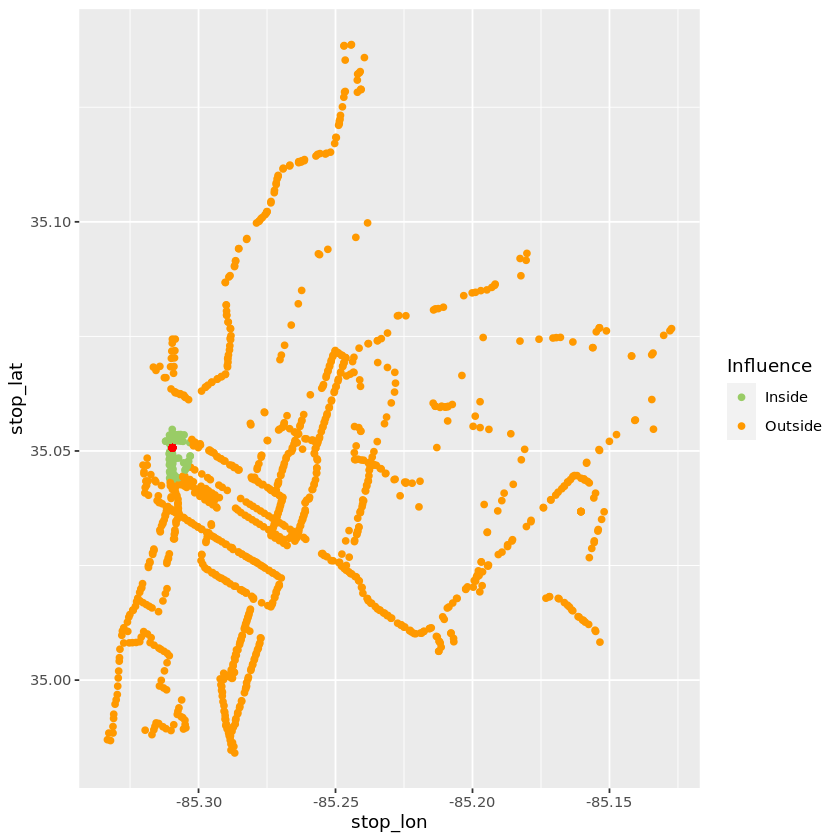

In [40]:
XdistX %>%
    ggplot(aes(x = stop_lon, y = stop_lat, colour = Condition)) +
    geom_point() +
    geom_point(aes(x = XdistX[XdistX['stop_id'] ==  '12',]$stop_lon, y = XdistX[XdistX['stop_id'] ==  '12',]$stop_lat), color = 'red') +
    scale_colour_manual(name = "Influence",
                        values = c("Inside" = "#99CC66",
                                   "Outside" = "#FF9900"))

In [ ]:
carta %>%
   filter(route_id == route, direction_id == direction, stop_id == bus_stop) %>%
   group_by(month, service_kind, hour) %>%
   summarise(mean_temp = mean(temp), mean_precip = mean(precip))

# Data Extraction

In [60]:
data_extraction <- function(route, direction, bus_stop, DTFRM, transf){
    
             
    dtfrm = DTFRM %>%
      filter(route_id == route, direction_id == direction)
    
    n_rows = DTFRM %>%
      filter(route_id == route, direction_id == direction, stop_id == bus_stop) %>%
      nrow()
    
    if (n_rows == 0){
        print('There are not rows in the data set with the required characteristics. Please change them.')
    }
    
    else{
          
        vinit = DTFRM %>%
          filter(route_id == route, direction_id == direction, stop_id == bus_stop) %>%
          group_by(month, service_kind, hour) %>%
          summarise(mean_temp = mean(temp), mean_precip = mean(precip))
    
        V1 = dtfrm %>%
          filter(stop_id == bus_stop) %>%
          summarise(month, service_kind, hour, board_count, alight_count)
        
        V1 = left_join(V1, vinit, on = c('month', 'service_kind', 'hour'))
        
#        return(V1)
    
        Relevant_Bus_Stops = radial_influence(bus_stop, Bus_stops)

        ind_excluded_stop = which((Relevant_Bus_Stops$stop_id == bus_stop) == T, arr.ind = T)
        
        bus_stops_ids = as.character(Relevant_Bus_Stops$stop_id[-ind_excluded_stop])
    
#        V2 = DTFRM %>%
#          filter(stop_id %in% bus_stops_ids)
        
#        return(V2)
        return(bus_stops_ids)
    
        V3 = DTFRM %>%
          filter(stop_id %in% bus_stops_ids) %>%
          group_by(month, service_kind, hour) %>%
          summarise(surrounding_board_count = mean(board_count), surrounding_alight_count = mean(alight_count))
        
#        return(V3)
        
        V = left_join(V1, V3, by = c('month', 'service_kind', 'hour'))
        
        if(transf == 'Normalization'){
          
          V$board_count = normalizer(V$board_count)
          V$alight_count = normalizer(V$alight_count)
          V$surrounding_board_count = normalizer(V$surrounding_board_count)
          V$surrounding_alight_count = normalizer(V$surrounding_alight_count)
          V$mean_temp = normalizer(V$mean_temp)
          V$mean_precip = normalizer(V$mean_precip)
        
#          return(V)
        }
        else if(transf == 'Standardize'){
          
          V$board_count = standardizer(V$board_count)
          V$alight_count = standardizer(V$alight_count)
          V$surrounding_board_count = standardizer(V$surrounding_board_count)
          V$surrounding_alight_count = standardizerr(V$surrounding_alight_count)
          V$mean_temp = standardizer(V$mean_temp)
          V$mean_precip = standardizer(V$mean_precip)
          
#          return(V)
        }
        else if(transf == 'features'){
          
          V$surrounding_board_count = normalizer(V$surrounding_board_count)
          V$surrounding_alight_count = normalizer(V$surrounding_alight_count)
          V$mean_temp = normalizer(V$mean_temp)
          V$mean_precip = normalizer(V$mean_precip)
          
#          return(V)
        }
        else{
#          return(V)
        }

    }        
}


## Example

In [61]:
XDTX = data_extraction('4', '1', '12', carta, 'features')
head(XDTX)

`summarise()` has grouped output by 'month', 'service_kind'. You can override using the `.groups` argument.

Joining, by = c("month", "service_kind", "hour")



[1] "971"  "146"  "1545" "972"  "81"   "90"

In [63]:
class(XDTX)

[1] "character"

In [73]:
carta %>%
    filter(route_id == '4', direction_id == '1', month == c('1','12')) %>%
    group_by(month, service_kind, hour) %>%
    summarise(mean_temp = mean(temp), mean_precip = mean(precip))

`summarise()` has grouped output by 'month', 'service_kind'. You can override using the `.groups` argument.



month,service_kind,hour,mean_temp,mean_precip
<fct>,<fct>,<fct>,<dbl>,<dbl>
1,weekday,0,0.116964,0.00000000
1,weekday,7,7.923020,0.77121417
1,weekday,9,5.459099,0.08364809
1,weekday,10,7.216546,0.16927814
1,weekday,11,7.561548,0.07274785
1,weekday,12,7.139961,0.14573155
1,weekday,13,10.001688,0.09607064
1,weekday,14,10.406416,0.13346128
1,weekday,15,9.928758,0.14589631


# Data Split

In [70]:
data_split <- function(DT, prop, set, dependent){
    n_rows = dim(DT)[1]
    train_set_size = floor(n_rows*prop)
    
    board_data = DT %>%
      summarise(board_count, month, service_kind, hour, mean_temp, mean_precip, surrounding_board_count)
    
    alight_data = DT %>%
      summarise(alight_count, month, service_kind, hour, mean_temp, mean_precip, surrounding_alight_count)
    
    set.seed(123)
    
    train = sample((1:n_rows), train_set_size, replace = F)
    
    if(dependent == 'board_count'){
      if(set == 'train'){
        train_set = board_data[train, ]
        return(train_set)
      }
      else{
        test_set = board_data[-train,]
        return(test_set)
      }
    }
    else{
      if(set == 'train'){
        train_set = alight_data[train, ]
        return(train_set)
      }
      else{
        test_set = alight_data[-train,]
        return(test_set)
      }
    }
}


## Example:

In [71]:
xDT_train_board_x = data_split(XDTX, 0.8, 'train', 'board_count')
xDT_train_board_x = data_split(XDTX, 0.8, 'test', 'board_count')
head(xDT_train_board_x)

board_count,month,service_kind,hour,mean_temp,mean_precip,surrounding_board_count
<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,11,weekday,20,NA,NA,NA
0,11,weekday,20,NA,NA,NA
0,11,weekday,20,NA,NA,NA
0,11,weekday,20,NA,NA,NA
0,11,weekday,20,NA,NA,NA
0,11,weekday,20,NA,NA,NA


In [ ]:
unique(XDTX$)

# Model Training and Selection

## CV

In [68]:
all_models_cv <- function(DT_train, DT_test, dependent){
        
        set.seed(123)
        rand_ind = groupKFold(c(1:dim(DT_train)[1]), k = 10)
        
        sm_Poiss <- list()
        sm_NB <- list()
        sm_ZI_Poiss <- list()
        sm_ZI_NB <- list()
        sm_hurdle <- list()
        
        RMSE_Poiss = 0
        RMSE_NB = 0
        RMSE_ZI_Poiss = 0
        RMSE_ZI_NB = 0
        RMSE_hurdle = 0
        
        k_fold_pred_Poiss <- list()
        k_fold_pred_NB <- list()
        k_fold_pred_ZI_Poiss <- list()
        k_fold_pred_ZI_NB <- list()
        k_fold_pred_hurdle <- list()
        
        predictions_Poiss = 0
        predictions_NB = 0
        predictions_ZI_Poiss = 0
        predictions_ZI_NB = 0
        predictions_hurdle = 0
        
        ind_Poiss = 0
        ind_NB = 0
        ind_ZI_Poiss = 0
        ind_ZI_NB = 0
        ind_hurdle = 0
        
        if(dependent == 'board_count'){
          for(i in 1:10){
                                           
            df = DT_train[rand_ind[[i]],]
            df_test = DT_train[-rand_ind[[i]],]
                       
            Poiss.fit = glm(board_count ~ ., data = df, family = 'poisson')
                         
            NB.fit = glm.nb(board_count ~ ., data = df)
                
            ZI.Poiss = zeroinfl(board_count ~ . | hour + service_kind,
                               data = df, dist = 'poisson', link = 'logit')
            
            ZI.NB = zeroinfl(board_count ~ . |  hour + service_kind,
                               data = df, dist = 'negbin', link = 'logit')
                
            hurdle.fit = hurdle(board_count ~ . |  hour + service_kind,
                                data = df, dist = 'poisson', zero.dist = 'binomial', link = 'logit')
                
                
            sm_Poiss[[i]] = Poiss.fit
            sm_NB[[i]] = NB.fit
            sm_ZI_Poiss[[i]] = ZI.Poiss
            sm_ZI_NB[[i]] = ZI.NB
            sm_hurdle[[i]] = hurdle.fit
                
            k_fold_pred_Poiss[[i]] = predict(Poiss.fit, df_test[ , -c(4)], type = "response")
            k_fold_pred_NB[[i]] = predict(NB.fit, df_test[ , -c(4)], type = "response")
            k_fold_pred_ZI_Poiss[[i]] = predict(ZI.Poiss, df_test[ , -c(4)], type = "response")
            k_fold_pred_ZI_NB[[i]] = predict(ZI.NB, df_test[ , -c(4)], type = "response")
            k_fold_pred_hurdle[[i]] = predict(hurdle.fit, df_test[ , -c(4)], type = "response")
                
            RMSE_Poiss[i] = sqrt(mean((df_test$board_count - k_fold_pred_Poiss[[i]])^{2}))
            RMSE_NB[i] = sqrt(mean((df_test$board_count - k_fold_pred_NB[[i]])^{2}))
            RMSE_ZI_Poiss[i] = sqrt(mean((df_test$board_count - k_fold_pred_ZI_Poiss[[i]])^{2}))
            RMSE_ZI_NB[i] = sqrt(mean((df_test$board_count - k_fold_pred_ZI_NB[[i]])^{2}))
            RMSE_hurdle[i] = sqrt(mean((df_test$board_count - k_fold_pred_hurdle[[i]])^{2}))
        }
                                           
        ind_Poiss = which(RMSE_Poiss == min(RMSE_Poiss), arr.ind = T)
        ind_NB = which(RMSE_NB == min(RMSE_NB), arr.ind = T)
        ind_ZI_Poiss = which(RMSE_ZI_Poiss == min(RMSE_ZI_Poiss), arr.ind = T)
        ind_ZI_NB = which(RMSE_ZI_NB == min(RMSE_ZI_NB), arr.ind = T)
        ind_hurdle = which(RMSE_hurdle == min(RMSE_hurdle), arr.ind = T)
            
        train_RMSE_Poiss = RMSE_Poiss[ind_Poiss]
        train_RMSE_NB = RMSE_NB[ind_NB]
        train_RMSE_ZI_Poiss = RMSE_ZI_Poiss[ind_ZI_Poiss]
        train_RMSE_ZI_NB = RMSE_ZIP_NB[ind_ZI_NB]
        train_RMSE_hurdle = RMSE_hurdle[ind_hurdle]
            
        model_Poiss = sm_Poiss[[ind_Poiss]]
        model_NB = sm_NB[[ind_NB]]
        model_ZI_Poiss = sm_ZIP_Poiss[[ind_ZI_Poiss]]
        model_ZI_NB = sm_ZIP_NB[[ind_ZI_NB]]
        model_hurdle = sm_hurdle[[ind_hurdle]]
        
        model_Poiss_AIC = AIC(model_Poiss)
        model_NB_AIC = AIC(model_NB)
        model_ZI_Poiss_AIC = AIC(model_ZI_Poiss)
        model_ZI_NB_AIC = AIC(model_ZI_NB)
        model_hurdle_AIC = AIC(model_hurdle)
        
        AICs = c(model_Poiss_AIC, model_NB_AIC,
                 model_ZI_Poiss_AIC, model_ZI_NB_AIC, model_hurdle_AIC)
    
        AIC_ind = which(AICs == min(AICs), arr.ind = T)
        
        Model_Name = c('Poisson', 'Negative_Binomial',
                       'ZI_Poisson', 'ZI_Negative_Binomial', 'Hurdle_Poisson_and_Binomial')
        
        Models_AIC = data.frame(cbind(Model_Name, c(model_Poiss_AIC, model_NB_AIC,
                                                    model_ZI_Poiss_AIC, model_ZI_NB_AIC, model_hurdle_AIC)))
        
        Selected_Model = Model_Name[AIC_ind]
                          
        test <- DT_test[ , -c(1)]
            
        predictions_Poiss = predict(model_Poiss, test, type = "response")
        predictions_NB = predict(model_NB, test, type = "response")
        predictions_ZP_Poiss = predict(model_ZI_Poiss, test, type = "response")
        predictions_ZI_NB = predict(model_ZI_NB, test, type = "response")
        predictions_hurdle = predict(model_hurdle, test, type = "response")
            
        test_RMSE_Poiss = sqrt(mean((DT_test$board_count - predictions_Poiss)^{2}))
        test_RMSE_NB = sqrt(mean((DT_test$board_count - predictions_NB)^{2}))
        test_RMSE_ZI_Poiss = sqrt(mean((DT_test$board_count - predictions_ZI_Poiss)^{2}))
        test_RMSE_ZI_NB = sqrt(mean((DT_test$board_count - predictions_ZI_NB)^{2}))
        test_RMSE_hurdle = sqrt(mean((DT_test$board_count - predictions_hurdle)^{2}))
            
        Train_RMSE = data.frame(cbind('Poiss' = train_RMSE_Poiss, 'NB' = train_RMSE_NB,
                                      'ZI_Poiss' = train_RMSE_ZI_Poiss, 'ZP_NB' = train_RMSE_ZI_NB, 'hurdle' = train_RMSE_hurdle))
    
        Test_RMSE = data.frame(cbind('Poiss' = test_RMSE_Poiss, 'NB' = test_RMSE_NB,
                                     'ZI_Poiss' = test_RMSE_ZI_Poiss, 'ZIP_NB' = test_RMSE_ZI_NB, 'hurdle' = test_RMSE_hurdle))
                    
        Models = list('Poiss' = model_Poiss, 'NB' = model_NB,
                      'ZI_Poiss' = model_ZI_Poiss, 'ZI_NB' = model_ZI_NB, 'hurdle' = model_hurdle)
            
        Predictions = data.frame(cbind('Poiss' = predictions_Poiss, 
                                       'NB' = predictions_NB,
                                       'ZI_Poiss' = predictions_ZI_Poiss,
                                       'ZI_NB' = predictions_ZI_NB,
                                       'hurdle' = predictions_hurdle,
                                       'count' = DT_test$board_count))
                      
        performance <- list("train_RMSEs" = Train_RMSE,
                            "test_RMSEs" = Test_RMSE,
                            "Models_AIC" = Models_AIC,
                            "Selected_Model" = Selected_Model,
                            "Trained_Models" = Models,
                            "Predicted" = Predictions)
        return(performance)
          
        }
        else{
          for(i in 1:10){
                                           
            df = DT_train[rand_ind[[i]],]
            df_test = DT_train[-rand_ind[[i]],]
                       
            Poiss.fit = glm(alight_count ~ ., data = df, family = 'poisson')
                          
            NB.fit = glm.nb(alight_count ~ ., data = df)
                
            ZI.Poiss = zeroinfl(alight_count ~ . | hour + service_kind,
                               data = df, dist = 'poisson', link = 'logit')
            
            ZI.NB = zeroinfl(alight_count ~ . |  hour + service_kind,
                               data = df, dist = 'negbin', link = 'logit')
                
            hurdle.fit = hurdle(alight_count ~ . |  hour + service_kind,
                                data = df, dist = 'poisson', zero.dist = 'binomial', link = 'logit')
                
                
            sm_Poiss[[i]] = Poiss.fit
            sm_NB[[i]] = NB.fit
            sm_ZI_Poiss[[i]] = ZI.Poiss
            sm_ZI_NB[[i]] = ZI.NB
            sm_hurdle[[i]] = hurdle.fit
                
            k_fold_pred_Poiss[[i]] = predict(Poiss.fit, df_test, type = "response")
            k_fold_pred_NB[[i]] = predict(NB.fit, df_test, type = "response")
            k_fold_pred_ZI_Poiss[[i]] = predict(ZI.Poiss, df_test, type = "response")
            k_fold_pred_ZI_NB[[i]] = predict(ZI.NB, df_test, type = "response")
            k_fold_pred_hurdle[[i]] = predict(hurdle.fit, df_test, type = "response")
                
            RMSE_Poiss[i] = sqrt(mean((df_test$alight_count - k_fold_pred_Poiss[[i]])^{2}))
            RMSE_NB[i] = sqrt(mean((df_test$alight_count - k_fold_pred_NB[[i]])^{2}))
            RMSE_ZI_Poiss[i] = sqrt(mean((df_test$alight_count - k_fold_pred_ZI_Poiss[[i]])^{2}))
            RMSE_ZI_NB[i] = sqrt(mean((df_test$alight_count - k_fold_pred_ZI_NB[[i]])^{2}))
            RMSE_hurdle[i] = sqrt(mean((df_test$alight_count - k_fold_pred_hurdle[[i]])^{2}))
        }
                                           
        ind_Poiss = which(RMSE_Poiss == min(RMSE_Poiss), arr.ind = T)
        ind_NB = which(RMSE_NB == min(RMSE_NB), arr.ind = T)
        ind_ZIP_Poiss = which(RMSE_ZIP_Poiss == min(RMSE_ZIP_Poiss), arr.ind = T)
        ind_ZIP_NB = which(RMSE_ZIP_NB == min(RMSE_ZIP_NB), arr.ind = T)
        ind_hurdle = which(RMSE_hurdle == min(RMSE_hurdle), arr.ind = T)
            
        train_RMSE_Poiss = RMSE_Poiss[ind_Poiss]
        train_RMSE_NB = RMSE_NB[ind_NB]
        train_RMSE_ZIP_Poiss = RMSE_ZIP_Poiss[ind_ZIP_Poiss]
        train_RMSE_ZIP_NB = RMSE_ZIP_NB[ind_ZIP_NB]
        train_RMSE_hurdle = RMSE_hurdle[ind_hurdle]
            
        model_Poiss = sm_Poiss[[ind_Poiss]]
        model_NB = sm_NB[[ind_NB]]
        model_ZIP_Poiss = sm_ZIP_Poiss[[ind_ZIP_Poiss]]
        model_ZIP_NB = sm_ZIP_NB[[ind_ZIP_NB]]
        model_hurdle = sm_hurdle[[ind_hurdle]]
        
        model_Poiss_AIC = AIC(model_Poiss)
        model_NB_AIC = AIC(model_NB)
        model_ZIP_Poiss_AIC = AIC(model_ZIP_Poiss)
        model_ZIP_NB_AIC = AIC(model_ZIP_NB)
        model_hurdle_AIC = AIC(model_hurdle)
        
        AICs = c(model_Poiss_AIC, model_NB_AIC,
                 model_ZIP_Poiss_AIC, model_ZIP_NB_AIC, model_hurdle_AIC)
    
        AIC_ind = which(AICs == min(AICs), arr.ind = T)
        
        Model_Name = c('Poisson', 'Negative_Binomial',
                       'ZIP_Poisson', 'ZIP_Negative_Binomial', 'Hurdle_Poisson_and_Binomial')
        
        Models_AIC = data.frame(cbind(Model_Name, c(model_Poiss_AIC, model_NB_AIC,
                                                    model_ZIP_Poiss_AIC, model_ZIP_NB_AIC, model_hurdle_AIC)))
        
        Selected_Model = Model_Name[AIC_ind]
                          
        test <- DT_test[ , -c(1)]
            
        predictions_Poiss = predict(model_Poiss, test, type = "response")
        predictions_NB = predict(model_NB, test, type = "response")
        predictions_ZIP_Poiss = predict(model_ZIP_Poiss, test, type = "response")
        predictions_ZIP_NB = predict(model_ZIP_NB, test, type = "response")
        predictions_hurdle = predict(model_hurdle, test, type = "response")
            
        test_RMSE_Poiss = sqrt(mean((DT_test$alight_count - predictions_Poiss)^{2}))
        test_RMSE_NB = sqrt(mean((DT_test$alight_count - predictions_NB)^{2}))
        test_RMSE_ZIP_Poiss = sqrt(mean((DT_test$alight_count - predictions_ZIP_Poiss)^{2}))
        test_RMSE_ZIP_NB = sqrt(mean((DT_test$alight_count - predictions_ZIP_NB)^{2}))
        test_RMSE_hurdle = sqrt(mean((DT_test$alight_count - predictions_hurdle)^{2}))
            
        Train_RMSE = data.frame(cbind('Poiss' = train_RMSE_Poiss, 'NB' = train_RMSE_NB,
                                      'ZIP_Poiss' = train_RMSE_ZIP_Poiss, 'ZIP_NB' = train_RMSE_ZIP_NB, 'hurdle' = train_RMSE_hurdle))
    
        Test_RMSE = data.frame(cbind('Poiss' = test_RMSE_Poiss, 'NB' = test_RMSE_NB,
                                     'ZIP_Poiss' = test_RMSE_ZIP_Poiss, 'ZIP_NB' = test_RMSE_ZIP_NB, 'hurdle' = test_RMSE_hurdle))
                    
        Models = list('Poiss' = model_Poiss, 'NB' = model_NB,
                      'ZIP_Poiss' = model_ZIP_Poiss, 'ZIP_NB' = model_ZIP_NB, 'hurdle' = model_hurdle)
            
        Predictions = data.frame(cbind('Poiss' = predictions_Poiss, 'NB' = predictions_NB,
                           'ZIP_Poiss' = predictions_ZIP_Poiss,  'ZIP_NB' = predictions_ZIP_NB, 'hurdle' = predictions_hurdle,
                           'count' = DT_test$alight_count)) 
                      
        performance <- list("train_RMSEs" = Train_RMSE,
                            "test_RMSEs" = Test_RMSE,
                            "Models_AIC" = Models_AIC,
                            "Selected_Model" = Selected_Model,
                            "Trained_Models" = Models,
                            "Predicted" = Predictions)
        return(performance)
        }               
            
}


In [69]:
all_models_cv(xDT_train_board_x, xDT_test_board_x, 'board_count')

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


# Full Function

In [1]:
Full_function <- function(route, direction, bus_stop, DTFRM, radius, transf){
    
    # Required libraries:
    
    require(tidyr)
    require(tidyverse)
    require(dplyr)
    require(readr)
    require(pscl)
    require(caret)
    require(MASS)
    require(xtable)
    
    #--------------------------------------------------------------------------------------
    # Data Extraction 
    #--------------------------------------------------------------------------------------
    
    ## Complete Data Set:
    
    xDTx = data_extraction(route, direction, bus_stop, carta, 0.5, 'features')
        
    n_rows = dim(xDTx)[1]
    train_set_size = floor(n_rows*prop)
    
    ### Board Counts:
    
    board_data = xDTx %>%
      summarise(board_count, month, service_kind, hour, mean_temp, mean_precip, surrounding_board_count)
    
    
    
    ### Alight Counts:
    
    alight_data = xDTx %>%
      summarise(alight_count, month, service_kind, hour, mean_temp, mean_precip, surrounding_alight_count)
    
    #--------------------------------------------------------------------------------------
    ## Pre_lockdown:
    xPre_lockx = carta %>%
        filter(date <= '2020-03-05')
    
    Pre_lock = data_extraction(route, direction, bus_stop, xPre_lockx, 0.5, 'features')
    
    Pre_n_rows = dim(Pre_lock)[1]
    Pre_train_set_size = floor(Pre_n_rows*prop)
    
    ### Board Counts:
    
    Pre_board_data = Pre_lock %>%
      summarise(board_count, month, service_kind, hour, mean_temp, mean_precip, surrounding_board_count)
    
    ### Alight Counts:
    
    Pre_alight_data = Pre_lock %>%
      summarise(alight_count, month, service_kind, hour, mean_temp, mean_precip, surrounding_alight_count)
    
    #--------------------------------------------------------------------------------------
    ## Post_lockdown:
    
    xPost_lockx = carta %>%
        filter(date > '2020-03-05')
    
    Post_lock = data_extraction(route, direction, bus_stop, xPost_lockx, 0.5, 'features')
    
    Post_n_rows = dim(Post_lock)[1]
    Post_train_set_size = floor(Post_n_rows*prop)
    
    ### Board Counts:
    
    Post_board_data = Post_lock %>%
      summarise(board_count, month, service_kind, hour, mean_temp, mean_precip, surrounding_board_count)
    
    ### Alight Counts:
    
    Post_alight_data = Post_lock %>%
      summarise(alight_count, month, service_kind, hour, mean_temp, mean_precip, surrounding_alight_count)
    
    #--------------------------------------------------------------------------------------   
    # Data Split
    #-------------------------------------------------------------------------------------- 
    
    ## Complete Data Set:
    
    set.seed(123)
    train = sample((1:n_rows), train_set_size, replace = F)
  
    board_data_train = board_data[train, ]
    board_data_test = board_data[-train, ]
  
    alight_data_train = alight_data[train, ]
    alight_data_test = alight_data[-train, ]
    
    #-------------------------------------------------------------------------------------- 
    ## Pre_lockdown:
    
    set.seed(123)
    Pre_train = sample((1:Pre_n_rows), Pre_train_set_size, replace = F)
    
    Pre_board_data_train = Pre_board_data[Pre_train, ]
    Pre_board_data_test = Pre_board_data[-Pre_train, ]
    
    ### Board Counts:
  
    Pre_board_data_train = Pre_board_data[Pre_train, ]
    Pre_board_data_test = Pre_board_data[-Pre_train, ]
    
    ### Alight Counts:
  
    Pre_alight_data_train = Pre_alight_data[Pre_train, ]
    Pre_alight_data_test = Pre_alight_data[-Pre_train, ]
    
    #-------------------------------------------------------------------------------------- 
    ## Post_lockdown:
    
    set.seed(123)
    Post_train = sample((1:Post_n_rows), Post_train_set_size, replace = F)
    
    Post_board_data_train = Post_board_data[Post_train, ]
    Post_board_data_test = Post_board_data[-Post_train, ]
    
    ### Board Counts:
  
    Post_board_data_train = Post_board_data[Post_train, ]
    Post_board_data_test = Post_board_data[-Post_train, ]
    
    ### Alight Counts:
  
    Post_alight_data_train = Post_alight_data[Post_train, ]
    Post_alight_data_test = Post_alight_data[-Post_train, ]
    
    #--------------------------------------------------------------------------------------
    # Model Training and Selection
    #--------------------------------------------------------------------------------------
    
    ## Complete Data Set:
    
    ### Board Count
    
    Performance_board = all_models_cv(board_data_train, board_data_test, 'board_count')
    
    ### Alight Count
    
    Performance_alight = all_models_cv(alight_data_train, alight_data_test, 'alight_count')
    
    #-------------------------------------------------------------------------------------- 
    ## Pre_lockdown:
    
    ### Board Count
    
    Performance_Pre_board = all_models_cv(Pre_board_data_train, Pre_board_data_test, 'board_count')
    
    ### Alight Count
    
    Performance_Pre_alight = all_models_cv(Pre_alight_data_train, Pre_alight_data_test, 'alight_count')
    
    #-------------------------------------------------------------------------------------- 
    ## Post_lockdown:
    
    ### Board Count
    
    Performance_Post_board = all_models_cv(Post_board_data_train, Post_board_data_test, 'board_count')
    
    ### Alight Count
    
    Performance_Post_alight = all_models_cv(Post_alight_data_train, Post_alight_data_test, 'alight_count')
    
    #--------------------------------------------------------------------------------------
    #--------------------------------------------------------------------------------------
    # Export *.csv Files
    #--------------------------------------------------------------------------------------
    #--------------------------------------------------------------------------------------
    
    ## Complete Data Set:
          
    ### 1. Model Coefficients of the Best Model: get_Model_Coeff
    
    #### Board Count
    
    file1_name_board = paste('Model_Coefficients', route, direction, bus_stop,'board_count.csv', sep = '_')
    board_Model_Coeff = get_Model_Coeff(Performance_board)
    write.csv(board_Model_Coeff, file1_name_board)    
    
    board_hist = xDTx %>%
        summarise(board_count)
    
    file1a_name_board = paste('Histogram', route, direction, bus_stop,'board_count.csv', sep = '_')
    write.csv(board_hist, file1a_name_board)
    
    #### Alight Count
    
    file1_name_alight = paste('Model_Coefficients', route, direction, bus_stop,'alight_count.csv', sep = '_')
    alight_Model_Coeff = get_Model_Coeff(Performance_alight)
    write.csv(alight_Model_Coeff, file1_name_alight)
    
    alight_hist = xDTx %>%
        summarise(alight_count)
    
    file1a_name_alight= paste('Histogram', route, direction, bus_stop,'alight_count.csv', sep = '_')
    write.csv(alight_hist, file1a_name_alight)
    
    #--------------------------------------------------------------------------------------
    ### 2. Model Chart:
    
    #### Board Count
    
    file2_name_board = paste('Model_Chart', route, direction, bus_stop,'board_count.csv', sep = '_')
    board_Model_Chart = get_Chart(Performance_board)
    write.csv(board_Model_Chart, file2_name_board)    
    
    #### Alight Count
    
    file2_name_alight = paste('Model_Chart', route, direction, bus_stop,'alight_count.csv', sep = '_')
    alight_Model_Chart = get_Chart(Performance_alight)
    write.csv(alight_Model_Chart, file2_name_alight)
    
    #--------------------------------------------------------------------------------------
    ### 3. Model Performance:
    
    #### Board Count
    
    file3_name_board = paste('Model_Performance', route, direction, bus_stop,'board_count.csv', sep = '_')
    board_Model_Performance = get_Performance(Performance_board)
    write.csv(board_Model_Performance, file3_name_board)    
    
    #### Alight Count
    
    file3_name_alight = paste('Model_Performance', route, direction, bus_stop,'alight_count.csv', sep = '_')
    alight_Model_Performance = get_Performance(Performance_alight)
    write.csv(alight_Model_Performance, file3_name_alight)
        
    #--------------------------------------------------------------------------------------
    ### 4. Model Selection:
    
    #### Board Count
    
    file4_name_board = paste('Selected_Model_AIC', route, direction, bus_stop,'board_count.csv', sep = '_')
    board_Selected_Model = get_Model_Selection(Performance_board)
    write.csv(board_Selected_Model, file4_name_board)
    
    #### Alight Count
    
    file4_name_alight = paste('Selected_Model_AIC', route, direction, bus_stop,'alight_count.csv', sep = '_')
    alight_Selected_Model = get_Model_Selection(Performance_alight)
    write.csv(alight_Selected_Model, file4_name_alight)
    
    #--------------------------------------------------------------------------------------
    ## Pre_lockdown:
    #--------------------------------------------------------------------------------------
          
    ### 1. Model Coefficients of the Best Model:
    
    #### Board Count
    
    file1_name_Pre_board = paste('Model_Coefficients', route, direction, bus_stop,'Pre_board_count.csv', sep = '_')
    Pre_board_Model_Coeff = get_Model_Coeff(Performance_Pre_board)
    write.csv(Pre_board_Model_Coeff, file1_name_Pre_board)
    
    Pre_board_hist = Pre_lock %>%
        summarise(board_count)
    
    file1a_name_Pre_board = paste('Histogram', route, direction, bus_stop,'Pre_board_count.csv', sep = '_')
    write.csv(Pre_board_hist, file1a_name_Pre_board)
    
    #### Alight Count
    
    file1_name_Pre_alight = paste('Model_Coefficients', route, direction, bus_stop,'Pre_alight_count.csv', sep = '_')
    Pre_alight_Model_Coeff = get_Model_Coeff(Performance_Pre_alight)
    write.csv(Pre_alight_Model_Coeff, file1_name_Pre_alight)
    
    Pre_alight_hist = Pre_lock %>%
        summarise(alight_count)
    
    file1a_name_Pre_alight= paste('Histogram', route, direction, bus_stop,'Pre_alight_count.csv', sep = '_')
    write.csv(Pre_alight_hist, file1a_name_Pre_alight)
    
    #--------------------------------------------------------------------------------------
    ### 2. Model Chart:
    
    #### Board Count
    
    file2_name_Pre_board = paste('Model_Chart', route, direction, bus_stop,'Pre_board_count.csv', sep = '_')
    Pre_board_Model_Chart = get_Chart(Performance_Pre_board)
    write.csv(Pre_board_Model_Chart, file2_name_Pre_board)    
    
    #### Alight Count
    
    file2_name_Pre_alight = paste('Model_Chart', route, direction, bus_stop,'Pre_alight_count.csv', sep = '_')
    Pre_alight_Model_Chart = get_Chart(Performance_Pre_alight)
    write.csv(Pre_alight_Model_Chart, file2_name_Pre_alight)
    
    #--------------------------------------------------------------------------------------
    ### 3. Model Performance:
    
    #### Board Count
    
    file3_name_Pre_board = paste('Model_Performance', route, direction, bus_stop,'Pre_board_count.csv', sep = '_')
    Pre_board_Model_Performance = get_Performance(Performance_Pre_board)
    write.csv(Pre_board_Model_Performance, file3_name_Pre_board)    
    
    #### Alight Count
    
    file3_name_Pre_alight = paste('Model_Performance', route, direction, bus_stop,'Pre_alight_count.csv', sep = '_')
    Pre_alight_Model_Performance = get_Performance(Performance_Pre_alight)
    write.csv(Pre_alight_Model_Performance, file3_name_Pre_alight)
        
    #--------------------------------------------------------------------------------------
    ### 4. Model Selection:
    
    #### Board Count
    
    file4_name_Pre_board = paste('Selected_Model_AIC', route, direction, bus_stop,'Pre_board_count.csv', sep = '_')
    Pre_board_Selected_Model = get_Model_Selection(Performance_Pre_board)
    write.csv(Pre_board_Selected_Model, file4_name_Pre_board)
    
    #### Alight Count
    
    file4_name_Pre_alight = paste('Selected_Model_AIC', route, direction, bus_stop,'Pre_alight_count.csv', sep = '_')
    Pre_alight_Selected_Model = get_Model_Selection(Performance_Pre_alight)
    write.csv(Pre_alight_Selected_Model, file4_name_Pre_alight)
    
    #--------------------------------------------------------------------------------------
    ## Post_lockdown:
    #--------------------------------------------------------------------------------------
          
    ### 1. Model Coefficients of the Best Model:
    
    #### Board Count
    
    file1_name_Post_board = paste('Model_Coefficients', route, direction, bus_stop,'Post_board_count.csv', sep = '_')
    Post_board_Model_Coeff = get_Model_Coeff(Performance_Post_board)
    write.csv(Post_board_Model_Coeff, file1_name_Post_board) 
    
    Post_board_hist = Post_lock %>%
        summarise(board_count)
    
    file1a_name_Post_board = paste('Histogram', route, direction, bus_stop,'Post_board_count.csv', sep = '_')
    write.csv(Post_board_hist, file1a_name_Post_board)
    
    #### Alight Count
    
    file1_name_Post_alight = paste('Model_Coefficients', route, direction, bus_stop,'Post_alight_count.csv', sep = '_')
    Post_alight_Model_Coeff = get_Model_Coeff(Performance_Post_alight)
    write.csv(Post_alight_Model_Coeff, file1_name_Post_alight)
    
    Post_alight_hist = Post_lock %>%
        summarise(alight_count)
    
    file1a_name_Post_alight= paste('Histogram', route, direction, bus_stop,'Post_alight_count.csv', sep = '_')
    write.csv(Post_alight_hist, file1a_name_Post_alight)
    
    #--------------------------------------------------------------------------------------
    ### 2. Model Chart:
    
    #### Board Count
    
    file2_name_Post_board = paste('Model_Chart', route, direction, bus_stop,'Post_board_count.csv', sep = '_')
    Post_board_Model_Chart = get_Chart(Performance_Post_board)
    write.csv(Post_board_Model_Chart, file2_name_Post_board)    
    
    #### Alight Count
    
    file2_name_Post_alight = paste('Model_Chart', route, direction, bus_stop,'Post_alight_count.csv', sep = '_')
    Post_alight_Model_Chart = get_Chart(Performance_Post_alight)
    write.csv(Post_alight_Model_Chart, file2_name_Post_alight)
    
    #--------------------------------------------------------------------------------------
    ### 3. Model Performance:
    
    #### Board Count
    
    file3_name_Post_board = paste('Model_Performance', route, direction, bus_stop,'Post_board_count.csv', sep = '_')
    Post_board_Model_Performance = get_Performance(Performance_Post_board)
    write.csv(Post_board_Model_Performance, file3_name_Post_board)    
    
    #### Alight Count
    
    file3_name_Post_alight = paste('Model_Performance', route, direction, bus_stop,'Post_alight_count.csv', sep = '_')
    Post_alight_Model_Performance = get_Performance(Performance_Post_alight)
    write.csv(Post_alight_Model_Performance, file3_name_Post_alight)
        
    #--------------------------------------------------------------------------------------
    ### 4. Model Selection:
    
    #### Board Count
    
    file4_name_Post_board = paste('Selected_Model_AIC', route, direction, bus_stop,'Post_board_count.csv', sep = '_')
    Post_board_Selected_Model = get_Model_Selection(Performance_Post_board)
    write.csv(Post_board_Selected_Model, file4_name_Post_board)
    
    #### Alight Count
    
    file4_name_Post_alight = paste('Selected_Model_AIC', route, direction, bus_stop,'Post_alight_count.csv', sep = '_')
    Post_alight_Selected_Model = get_Model_Selection(Performance_Post_alight)
    write.csv(Post_alight_Selected_Model, file4_name_Post_alight)
    
    #--------------------------------------------------------------------------------------
    #--------------------------------------------------------------------------------------
    # Export *.tex Files  get_Model_Selection
    #--------------------------------------------------------------------------------------
    #--------------------------------------------------------------------------------------
    ## Complete Data Set:
    
    ### Board Counts:
    
    board_Dispersion = xDTx %>%
        summarise(Mean = mean(board_count), Variance = var(board_count))
    
    Xboard_Model_Performance = xtable(board_Model_Performance)
    XXboard_Model_Performance = print(Xboard_Model_Performance)
    file3b_name_board = paste('Model_Performance', route, direction, bus_stop,'table_board_count.tex', sep = '_')
    
    write(XXboard_Model_Performance, file3b_name_board)
        
    ### Alight Counts:
    
    alight_Dispersion = xDTx %>%
        summarise(Mean = mean(alight_count), Variance = var(alight_count))
    
    Xalight_Model_Performance = xtable(alight_Model_Performance)
    XXalight_Model_Performance = print(Xalight_Model_Performance)
    file3b_name_alight = paste('Model_Performance', route, direction, bus_stop,'table_alight_count.tex', sep = '_')
    
    write(XXalight_Model_Performance, file3b_name_alight)
    
    #--------------------------------------------------------------------------------------
    Dispersion = data.frame(rbind('Board_Count' = board_Dispersion, 'Alight_Count' = alight_Dispersion))
    
    xDispersion = xtable(Dispersion)
    XxDispersion = print(xDispersion)
    
    file1b_Dispersion = paste('Dispersion', route, direction, bus_stop,'table.tex', sep = '_')
    
    write(XxDispersion, file1b_Dispersion)
    
    #--------------------------------------------------------------------------------------
    ## Pre_lockdown:
    
    ### Board Counts:
    
     Pre_board_Dispersion = Pre_lock %>%
        summarise(Mean = mean(board_count), Variance = var(board_count))
    
    file3b_name_Pre_board = paste('Model_Performance', route, direction, bus_stop,'table_Pre_board_count.tex', sep = '_')
    XPre_board_Model_Performance = xtable(Pre_board_Model_Performance) 
    XXPre_board_Model_Performance = print(XPre_board_Model_Performance)
    
    write(XXPre_board_Model_Performance, file3b_name_Pre_board)
    
    ### Alight Counts:
    
     Pre_alight_Dispersion = Pre_lock %>%
        summarise(Mean = mean(alight_count), Variance = var(alight_count))
    
    file3b_name_Pre_alight = paste('Model_Performance', route, direction, bus_stop,'table_Pre_alight_count.tex', sep = '_')
    XPre_alight_Model_Performance = xtable(Pre_alight_Model_Performance) 
    XXPre_alight_Model_Performance = print(XPre_alight_Model_Performance)
    
    write(XXPre_alight_Model_Performance, file3b_name_Pre_alight)
    
    #--------------------------------------------------------------------------------------
    Pre_Dispersion = data.frame(rbind('Board_Count' = Pre_board_Dispersion, 'Alight_Count' = Pre_alight_Dispersion))
    
    xPre_Dispersion = xtable(Pre_Dispersion)
    XxPre_Dispersion = print(xPre_Dispersion)
    
    file1b_Pre_Dispersion = paste('Pre_Dispersion', route, direction, bus_stop,'table.tex', sep = '_')
    
    write(XxPre_Dispersion, file1b_Pre_Dispersion)
    
    #--------------------------------------------------------------------------------------
    ## Post_lockdown:
    
    ### Board Counts:
    
     Post_board_Dispersion = Post_lock %>%
        summarise(Mean = mean(board_count), Variance = var(board_count))
    
    file3b_name_Post_board = paste('Model_Performance', route, direction, bus_stop,'table_Post_board_count.tex', sep = '_')
    XPost_board_Model_Performance = xtable(Post_board_Model_Performance) 
    XXPost_board_Model_Performance = print(XPost_board_Model_Performance)
    
    write(XXPost_board_Model_Performance, file3b_name_Post_board)
    
    ### Alight Counts:
    
     Post_alight_Dispersion = Post_lock %>%
        summarise(Mean = mean(alight_count), Variance = var(alight_count))
    
    Post_Dispersion = data.frame(rbind('Board Count' = Post_board_Dispersion, 'Alight Count' = Post_alight_Dispersion))
    
    xPost_Dispersion = xtable(Post_Dispersion)
    XxPost_Dispersion = print(xPost_Dispersion)
    
    file1b_Post_Dispersion = paste('Post_Dispersion', route, direction, bus_stop,'table.tex', sep = '_')
    
    write(XxPost_Dispersion, file1b_Post_Dispersion)
}
